<a href="https://colab.research.google.com/github/ajsanjoaquin/Pneumothorax/blob/master/Pneumothorax_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Hello! 
This notebook is provided 'as-is' from the original file used for the datathon. I've added some guides to make the code more readable 

In [0]:
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '1' #update to 1 gpu
# from data_pipeline import *
# from model_metrics import *
# from model_utils import *
import glob as glob
from fastai.vision import *
import seaborn as sns

torch.cuda.set_device(2)

###Sanity Check

In [0]:
torch.cuda.is_available()

True

In [0]:
train_root_dir = os.path.join(os.environ['JUPYTER_HOME'], 'datasets-ssd/SIIM_ACR/train')
csv_root = os.path.join(train_root_dir, 'train-rle.csv')
train_csv = pd.read_csv(csv_root)

print(train_root_dir)

/home/projects/21170165/datath03/jupyter/datasets-ssd/SIIM_ACR/train


In [0]:
print(train_csv.columns.tolist()) #note how Encoded has a SPACE

['ImageId', ' EncodedPixels']


##Data Cleaning

In [0]:
train_csv[' EncodedPixels']=train_csv[' EncodedPixels'].replace({'-1':'0'},regex=True)

train_csv[' EncodedPixels'] = train_csv[' EncodedPixels'].replace({'[1-9].*':'1'}, regex=True)

#1= Positive
#0=Negative
train_csv

ImageId  EncodedPixels
0      1.2.276.0.7230010.3.1.4.8323329.5597.151787518...              0
1      1.2.276.0.7230010.3.1.4.8323329.12515.15178752...              0
2      1.2.276.0.7230010.3.1.4.8323329.4904.151787518...              1
3      1.2.276.0.7230010.3.1.4.8323329.32579.15178751...              1
4      1.2.276.0.7230010.3.1.4.8323329.32579.15178751...              1
5      1.2.276.0.7230010.3.1.4.8323329.32579.15178751...              1
6      1.2.276.0.7230010.3.1.4.8323329.32579.15178751...              1
7      1.2.276.0.7230010.3.1.4.8323329.1314.151787516...              1
8      1.2.276.0.7230010.3.1.4.8323329.11364.15178752...              0
9      1.2.276.0.7230010.3.1.4.8323329.4541.151787518...              0
10     1.2.276.0.7230010.3.1.4.8323329.4440.151787518...              1
11     1.2.276.0.7230010.3.1.4.8323329.4982.151787518...              1
12     1.2.276.0.7230010.3.1.4.8323329.31759.15178751...              0
13     1.2.276.0.7230010.3.1.4.8323329.12743.15178752...              1
14     1.2.276.0.7230010.3.1.4.8323329.11633.15178752...              1
15     1.2.276.0.7230010.3.1.4.8323329.11512.15178752...              0
16     1.2.276.0.7230010.3.1.4.8323329.2663.151787517...              1
17     1.2.276.0.7230010.3.1.4.8323329.10206.15178752...              0
18     1.2.276.0.7230010.3.1.4.8323329.5782.151787519...              1
19     1.2.276.0.7230010.3.1.4.8323329.3604.151787517...              1
20     1.2.276.0.7230010.3.1.4.8323329.3604.151787517...              1
21     1.2.276.0.7230010.3.1.4.8323329.3058.151787517...              0
22     1.2.276.0.7230010.3.1.4.8323329.13204.15178752...              1
23     1.2.276.0.7230010.3.1.4.8323329.32620.15178751...              1
24     1.2.276.0.7230010.3.1.4.8323329.32620.15178751...              1
25     1.2.276.0.7230010.3.1.4.8323329.32620.15178751...              1
26     1.2.276.0.7230010.3.1.4.8323329.1187.151787516...              1
27     1.2.276.0.7230010.3.1.4.8323329.1187.151787516...              1
28     1.2.276.0.7230010.3.1.4.8323329.11551.15178752...              0
29     1.2.276.0.7230010.3.1.4.8323329.1614.151787516...              0
...                                                  ...            ...
11552  1.2.276.0.7230010.3.1.4.8323329.4960.151787518...              0
11553  1.2.276.0.7230010.3.1.4.8323329.12235.15178752...              0
11554  1.2.276.0.7230010.3.1.4.8323329.2808.151787517...              0
11555  1.2.276.0.7230010.3.1.4.8323329.11708.15178752...              0
11556  1.2.276.0.7230010.3.1.4.8323329.13308.15178752...              0
11557  1.2.276.0.7230010.3.1.4.8323329.13341.15178752...              0
11558  1.2.276.0.7230010.3.1.4.8323329.4600.151787518...              0
11559  1.2.276.0.7230010.3.1.4.8323329.5426.151787518...              0
11560  1.2.276.0.7230010.3.1.4.8323329.4732.151787518...              0
11561  1.2.276.0.7230010.3.1.4.8323329.4684.151787518...              0
11562  1.2.276.0.7230010.3.1.4.8323329.4632.151787518...              0
11563  1.2.276.0.7230010.3.1.4.8323329.11565.15178752...              0
11564  1.2.276.0.7230010.3.1.4.8323329.3742.151787517...              0
11565  1.2.276.0.7230010.3.1.4.8323329.11173.15178752...              0
11566  1.2.276.0.7230010.3.1.4.8323329.1003.151787516...              0
11567  1.2.276.0.7230010.3.1.4.8323329.388.1517875162...              0
11568  1.2.276.0.7230010.3.1.4.8323329.11165.15178752...              0
11569  1.2.276.0.7230010.3.1.4.8323329.2131.151787517...              1
11570  1.2.276.0.7230010.3.1.4.8323329.3335.151787517...              1
11571  1.2.276.0.7230010.3.1.4.8323329.1805.151787516...              1
11572  1.2.276.0.7230010.3.1.4.8323329.32260.15178751...              1
11573  1.2.276.0.7230010.3.1.4.8323329.1172.151787516...              0
11574  1.2.276.0.7230010.3.1.4.8323329.1723.151787516...              0
11575  1.2.276.0.7230010.3.1.4.8323329.32459.15178751...              1
11576  1.2.276.0.

In [0]:
imgName_train = [i.split('/')[-1] for i in imgs_train]
imgName_valid = [i.split('/')[-1] for i in imgs_valid]



In [0]:
train_csv.sort_values('ImageId')
train_csv.head()

ImageId  EncodedPixels
0  1.2.276.0.7230010.3.1.4.8323329.5597.151787518...              0
1  1.2.276.0.7230010.3.1.4.8323329.12515.15178752...              0
2  1.2.276.0.7230010.3.1.4.8323329.4904.151787518...              1
3  1.2.276.0.7230010.3.1.4.8323329.32579.15178751...              1
4  1.2.276.0.7230010.3.1.4.8323329.32579.15178751...              1

In [0]:
train_csv.to_csv('train.csv',index=False)

In [0]:
#@title Running on 1024 X 1024
#
data = (ImageList.from_csv('/','raid/projects/21170165/datath03/train.csv', folder=train_root_dir+'/images/1024/dicom',cols='ImageId',suffix='.png')
           .split_by_rand_pct(valid_pct=0.2, seed=34)
           .label_from_df(cols=' EncodedPixels')
           .databunch(bs=8, num_workers=0))

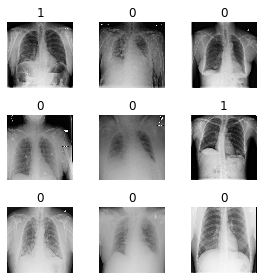

In [0]:
data.show_batch(rows=3, figsize=(4,4))

In [0]:
len(train_csv)

11582

In [0]:
train_root_dir

'/home/projects/21170165/datath03/jupyter/datasets-ssd/SIIM_ACR/train'

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

###Ran this on the resnet50 model @ 1024 x 1024

In [0]:
learn.fit_one_cycle(4)

In [0]:
learn.save('stage1')

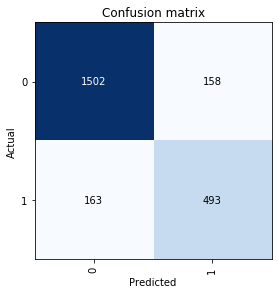

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

##2nd Attempt. The version I eventually ended up using

In [0]:
#attempt2
data = (ImageList.from_csv('/','raid/projects/21170165/datath03/train.csv', folder=train_root_dir+'/images/512/dicom',cols='ImageId',suffix='.png')
           .split_by_rand_pct(valid_pct=0.2, seed=34)
           .label_from_df(cols=' EncodedPixels')
           .databunch(bs=16, num_workers=0)
           .normalize(imagenet_stats))
           

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(3)

Had to use this code to change the default path save from the fastai library. Taken from the forums.

In [0]:
def custom_path_save(self, name:PathOrStr, path='./checkpoints', return_path:bool=False, with_opt:bool=True):
        "Save model and optimizer state (if `with_opt`) with `name` to `self.model_dir`."
        # delete #  path = self.path/self.model_dir/f'{name}.pth'
        # my addition: start
        if path=='': path = self.path/self.model_dir/f'{name}.pth'
        else: path = f'{path}/{name}.pth'
        # end
        if not with_opt: state = get_model(self.model).state_dict()
        else: state = {'model': get_model(self.model).state_dict(), 'opt':self.opt.state_dict()}
        torch.save(state, path)
        if return_path: return path

def custom_path_load(self, name:PathOrStr, path='./checkpoints', device:torch.device=None, strict:bool=True, with_opt:bool=None,purge=False):
        "Load model and optimizer state (if `with_opt`) `name` from `self.model_dir` using `device`."
        if device is None: device = self.data.device
        # delete # state = torch.load(self.path/self.model_dir/f'{name}.pth', map_location=device)
        # my addition: start
        if path=='': path = self.path/self.model_dir/f'{name}.pth'
        else: path = f'{path}/{name}.pth'
        state = torch.load(path, map_location=device) 
        # end
        if set(state.keys()) == {'model', 'opt'}:
            get_model(self.model).load_state_dict(state['model'], strict=strict)
            if ifnone(with_opt,True):
                if not hasattr(self, 'opt'): opt = self.create_opt(defaults.lr, self.wd)
                try:    self.opt.load_state_dict(state['opt'])
                except: pass
        else:
            if with_opt: warn("Saved filed doesn't contain an optimizer state.")
            get_model(self.model).load_state_dict(state, strict=strict)
        return self

learn.save = custom_path_save.__get__(learn)
learn.load = custom_path_load.__get__(learn)
# if you don't want to overload
#learn.custom_path_save = custom_path_save.__get__(learn)
#learn.custom_path_load = custom_path_load.__get__(learn)


model_path ='./checkpoints'#raid/projects/21170165/datath03'
#learn.save('stage1REVISED', path=model_path)

In [0]:
#reloaded to test custom function
learn.load('stage1REVISED', path=model_path)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


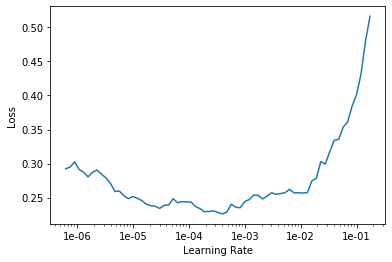

In [0]:
#@title These are all failed attempts. I kept reloading a checkpoint everytime the accuracy drops. Keep scrolling down until you see the GradCam code that was implemented
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, 1e-04, moms=(0.8,0.7))

In [0]:
#learn.save('stage2', path=model_path)
#test stage2 by continuing with this; test stage1revised by adding more epoch then use lr finder
learn.load('stage2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


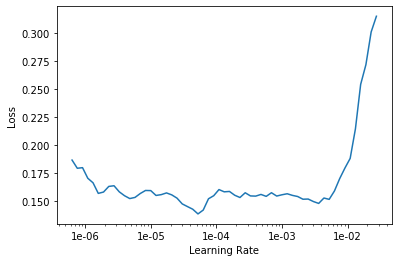

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 2e-04)

In [0]:
interp = ClassificationInterpretation.from_learner(learn,ds_type = DatasetType.Valid)

interp.preds.shape

torch.Size([2316, 2])

In [0]:
from fastai.callbacks.hooks import *
import scipy.ndimage
import gc

Full credit for code goes to Quan Tran. Got it from his repo: 

https://github.com/anhquan0412/animation-classification/blob/master/gradcam.py

In [0]:
from fastai.vision import *
from fastai.callbacks.hooks import *
import scipy.ndimage

class GradCam():
    @classmethod
    def from_interp(cls,learn,interp,img_idx,ds_type=DatasetType.Valid,include_label=False):
        # produce heatmap and xb_grad for pred label (and actual label if include_label is True)
        if ds_type == DatasetType.Valid:
            ds = interp.data.valid_ds
        elif ds_type == DatasetType.Test:
            ds = interp.data.test_ds
            include_label=False
        else:
            return None
        
        x_img = ds.x[img_idx]
        xb,_ = interp.data.one_item(x_img)
        xb_img = Image(interp.data.denorm(xb)[0])
        probs = interp.preds[img_idx].numpy()

        pred_idx = interp.pred_class[img_idx].item() # get class idx of img prediction label
        hmap_pred,xb_grad_pred = get_grad_heatmap(learn,xb,pred_idx,size=xb_img.shape[-1])
        prob_pred = probs[pred_idx]
        
        actual_args=None
        if include_label:
            actual_idx = ds.y.items[img_idx] # get class idx of img actual label
            if actual_idx!=pred_idx:
                hmap_actual,xb_grad_actual = get_grad_heatmap(learn,xb,actual_idx,size=xb_img.shape[-1])
                prob_actual = probs[actual_idx]
                actual_args=[interp.data.classes[actual_idx],prob_actual,hmap_actual,xb_grad_actual]
        
        return cls(xb_img,interp.data.classes[pred_idx],prob_pred,hmap_pred,xb_grad_pred,actual_args)
    
    @classmethod
    def from_one_img(cls,learn,x_img,label1=None,label2=None):
        '''
        learn: fastai's Learner
        x_img: fastai.vision.image.Image
        label1: generate heatmap according to this label. If None, this wil be the label with highest probability from the model
        label2: generate additional heatmap according to this label
        '''
        pred_class,pred_idx,probs = learn.predict(x_img)
        label1= str(pred_class) if not label1 else label1
        
        xb,_ = learn.data.one_item(x_img)
        xb_img = Image(learn.data.denorm(xb)[0])
        probs = probs.numpy()
        
        label1_idx = learn.data.classes.index(label1)
        hmap1,xb_grad1 = get_grad_heatmap(learn,xb,label1_idx,size=xb_img.shape[-1])
        prob1 = probs[label1_idx]
        
        label2_args = None
        if label2:
            label2_idx = learn.data.classes.index(label2)
            hmap2,xb_grad2 = get_grad_heatmap(learn,xb,label2_idx,size=xb_img.shape[-1])
            prob2 = probs[label2_idx]
            label2_args = [label2,prob2,hmap2,xb_grad2]
            
        return cls(xb_img,label1,prob1,hmap1,xb_grad1,label2_args)
    
    def __init__(self,xb_img,label1,prob1,hmap1,xb_grad1,label2_args=None):
        self.xb_img=xb_img
        self.label1,self.prob1,self.hmap1,self.xb_grad1 = label1,prob1,hmap1,xb_grad1
        if label2_args:
            self.label2,self.prob2,self.hmap2,self.xb_grad2 = label2_args
            
    def plot(self,plot_hm=True,plot_gbp=True):
        if not plot_hm and not plot_gbp:
            plot_hm=True
        cols = 5 if hasattr(self, 'label2') else 3
        if not plot_gbp or not plot_hm:
            cols-= 2 if hasattr(self, 'label2') else 1

        fig,row_axes = plt.subplots(1,cols,figsize=(cols*5,5))  
        col=0
        size=self.xb_img.shape[-1]
        self.xb_img.show(row_axes[col]);col+=1
        
        label1_title = f'1.{self.label1} {self.prob1:.3f}'
        if plot_hm:
            show_heatmap(self.hmap1,self.xb_img,size,row_axes[col])
            row_axes[col].set_title(label1_title);col+=1
        if plot_gbp:
            row_axes[col].imshow(self.xb_grad1)
            row_axes[col].set_axis_off()
            row_axes[col].set_title(label1_title);col+=1
        
        if hasattr(self, 'label2'):
            label2_title = f'2.{self.label2} {self.prob2:.3f}'
            if plot_hm:
                show_heatmap(self.hmap2,self.xb_img,size,row_axes[col])
                row_axes[col].set_title(label2_title);col+=1
            if plot_gbp:
                row_axes[col].imshow(self.xb_grad2)
                row_axes[col].set_axis_off()
                row_axes[col].set_title(label2_title)
        # plt.tight_layout()
        fig.subplots_adjust(wspace=0, hspace=0)
        # fig.savefig('data_draw/both/gradcam.png')

def minmax_norm(x):
    return (x - np.min(x))/(np.max(x) - np.min(x))
def scaleup(x,size):
    scale_mult=size/x.shape[0]
    upsampled = scipy.ndimage.zoom(x, scale_mult)
    return upsampled

# hook for Gradcam
def hooked_backward(m,xb,target_layer,clas):
    with hook_output(target_layer) as hook_a: #hook at last layer of group 0's output (after bn, size 512x7x7 if resnet34)
        with hook_output(target_layer, grad=True) as hook_g: # gradient w.r.t to the target_layer
            preds = m(xb)
            preds[0,int(clas)].backward() # same as onehot backprop
    return hook_a,hook_g

def clamp_gradients_hook(module, grad_in, grad_out):
    for grad in grad_in:
        torch.clamp_(grad, min=0.0)
        
# hook for guided backprop
def hooked_ReLU(m,xb,clas):
    relu_modules = [module[1] for module in m.named_modules() if str(module[1]) == "ReLU(inplace)"]
    with callbacks.Hooks(relu_modules, clamp_gradients_hook, is_forward=False) as _:
        preds = m(xb)
        preds[0,int(clas)].backward()
        
def guided_backprop(learn,xb,y):
    xb = xb.cuda()
    m = learn.model.eval();
    xb.requires_grad_();
    if not xb.grad is None:
        xb.grad.zero_(); 
    hooked_ReLU(m,xb,y);
    return xb.grad[0].cpu().numpy()

def show_heatmap(hm,xb_im,size,ax=None):
    if ax is None:
        _,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.8, extent=(0,size,size,0),
              interpolation='bilinear',cmap='magma');

def get_grad_heatmap(learn,xb,y,size):
    '''
    Main function to get hmap for heatmap and xb_grad for guided backprop
    '''
    xb = xb.cuda()
    m = learn.model.eval();
    target_layer = m[0][-1][-1] # last layer of group 0
    hook_a,hook_g = hooked_backward(m,xb,target_layer,y)
    
    target_act= hook_a.stored[0].cpu().numpy()
    target_grad = hook_g.stored[0][0].cpu().numpy()
    
    mean_grad = target_grad.mean(1).mean(1)
#     hmap = (target_act*mean_grad[...,None,None]).mean(0)
    hmap = (target_act*mean_grad[...,None,None]).sum(0)
    hmap = np.where(hmap >= 0, hmap, 0)
    
    xb_grad = guided_backprop(learn,xb,y) # (3,224,224)        
    #minmax norm the grad
    xb_grad = minmax_norm(xb_grad)
    hmap_scaleup = minmax_norm(scaleup(hmap,size)) # (224,224)
    
    # multiply xb_grad and hmap_scaleup and switch axis
    xb_grad = np.einsum('ijk, jk->jki',xb_grad, hmap_scaleup) #(224,224,3)
    
    return hmap,xb_grad

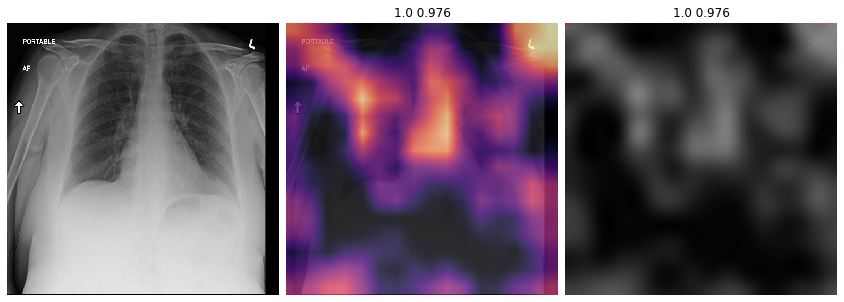

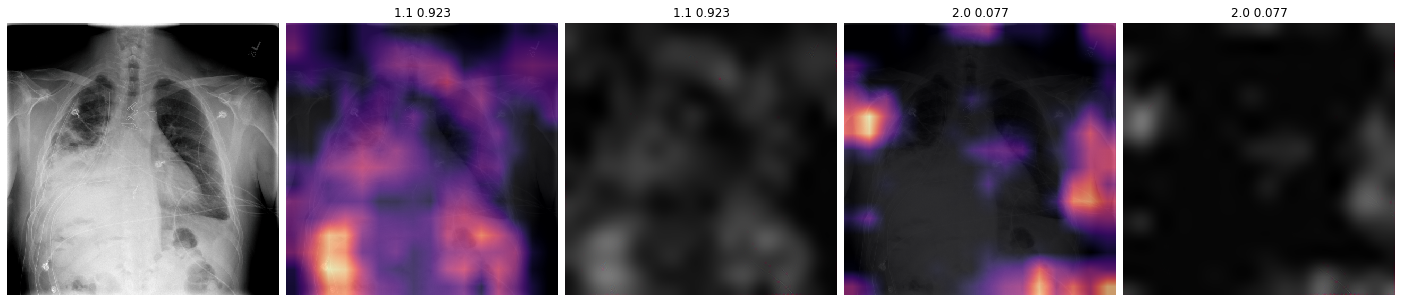

In [0]:
for idx in range(2):
    gcam = GradCam.from_interp(learn,interp,idx,ds_type = DatasetType.Valid,include_label=True)
    gcam.plot()


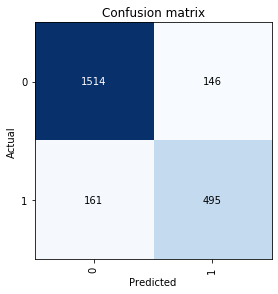

In [0]:
interp.plot_confusion_matrix()

###It's good practice to keep saving checkpoints so that you wouldn't have to retrain the model if accuracy doesn't improve.

At this point, my general strategy was to use lr_finder to find a good learning rate (it's frozen at default with only the topmost layer being trained), unfreeze,  then use one-cycle, freeze, save, and repeat.

If it doesn't increase accuracy, I just keep loading the previous checkpoint.

In [0]:
learn.save('stage2a')
learn.load('stage2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


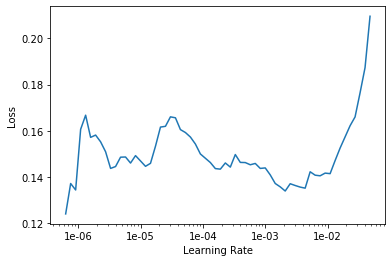

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
precision_score = Precision(pos_label=1)
recall_score = Recall(pos_label=1)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=(accuracy,precision_score,recall_score))

In [0]:
learn.load('stage1REVISED', path=model_path)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


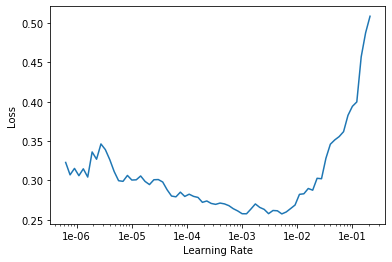

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(3, max_lr=slice(1e-04,1e-03))

In [0]:
learn.freeze()

In [0]:
#learn.save('stage2b')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


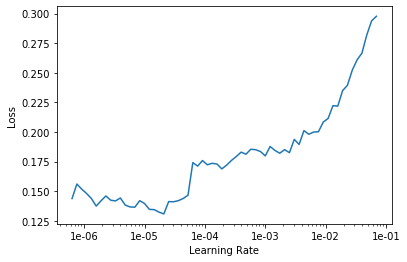

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-05)

In [0]:
learn.freeze()

In [0]:
#learn.save('stage3')
#so stage1REVISED->stage2b->stage3

### At this point, I just tried to replicate the 89% accuracy I got in a previous training because it wasn't saved. I ended up using the version immediately on top ^ (stage3). Sample images and GradCam output are below.

In [0]:
learn.load('stage3')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


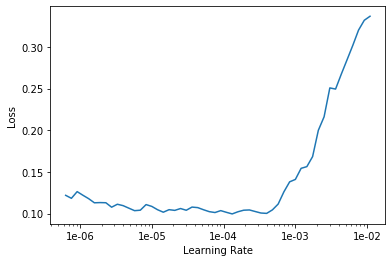

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(4, 1e-05)

In [0]:
learn.load('stage3', path=model_path)

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


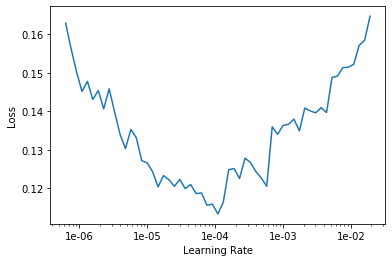

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1, 1e05)

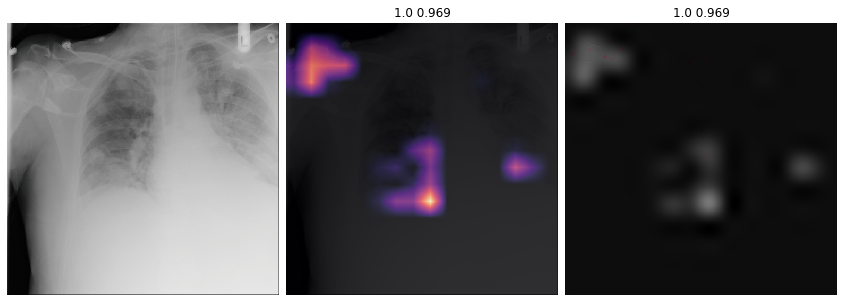

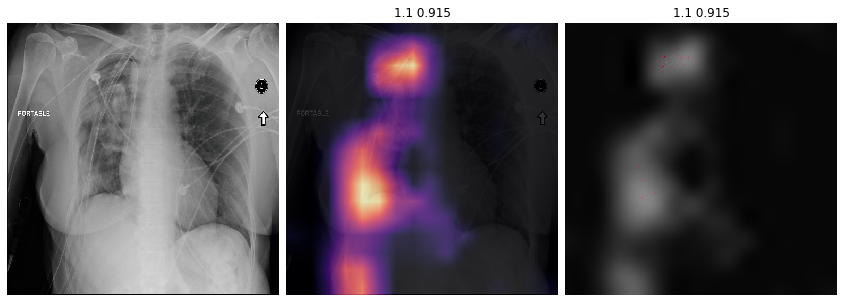

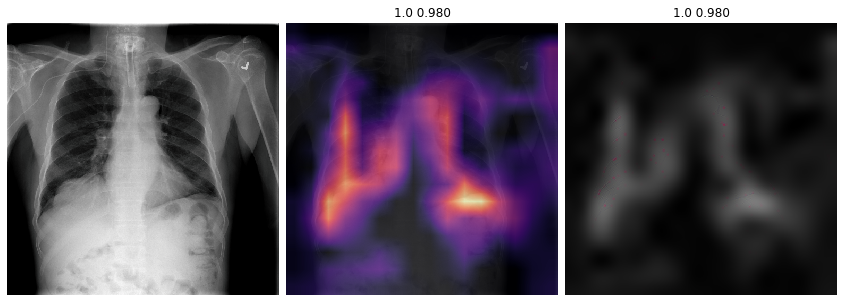

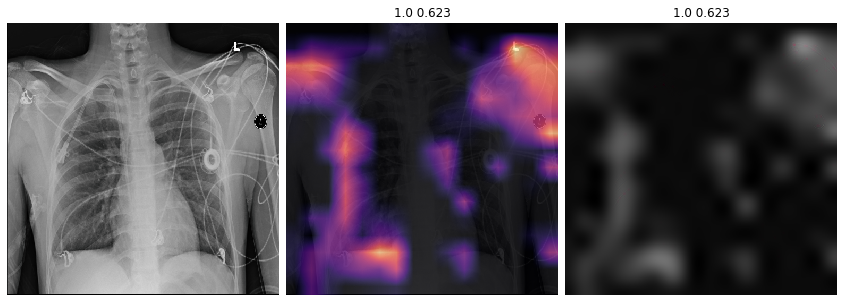

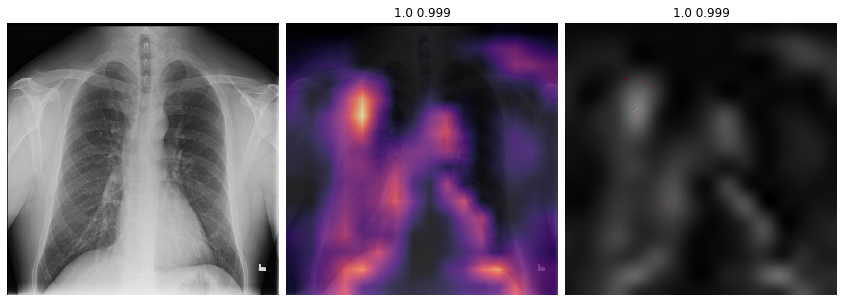

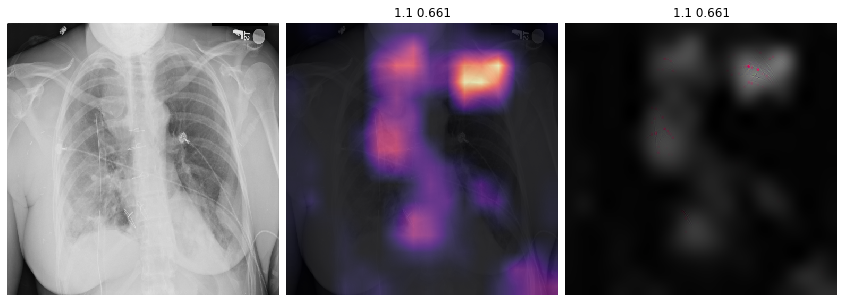

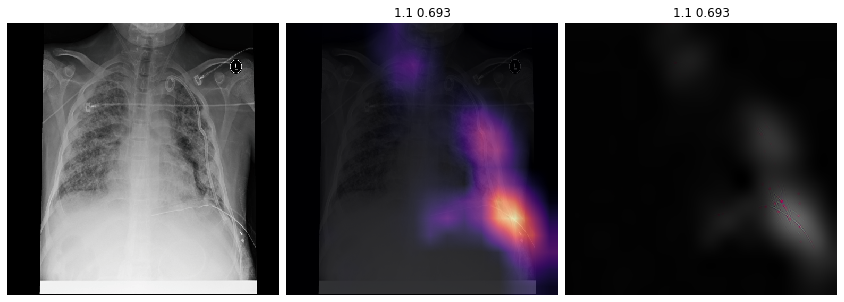

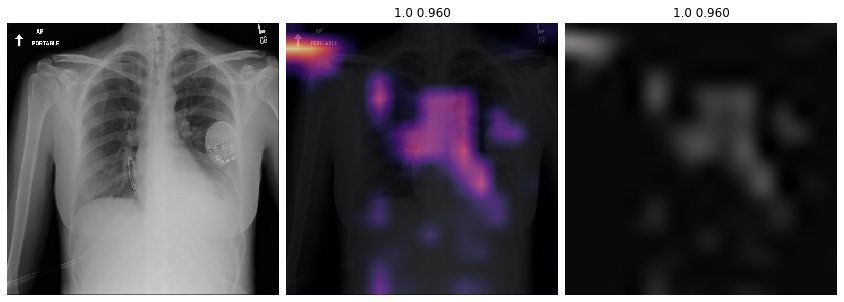

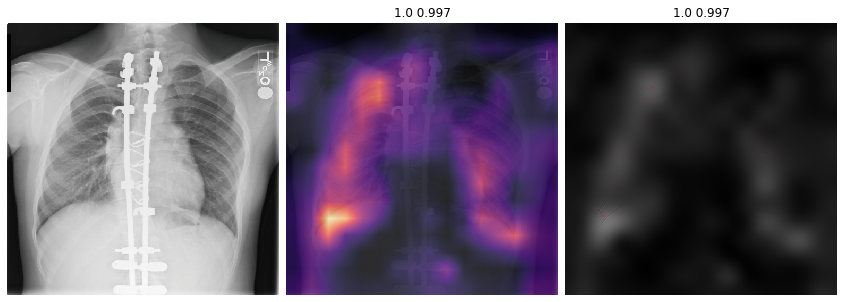

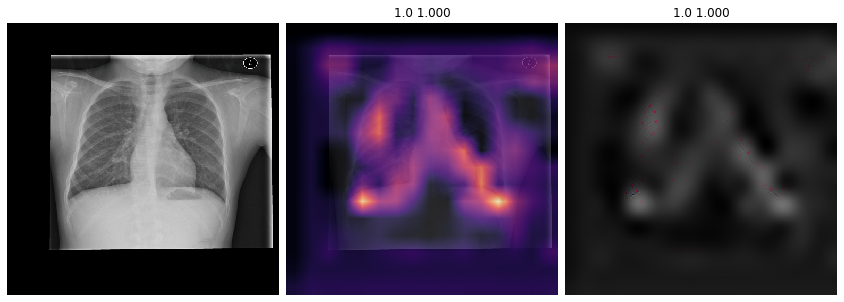

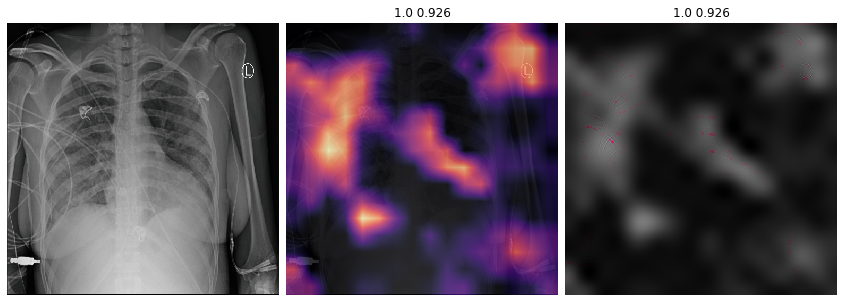

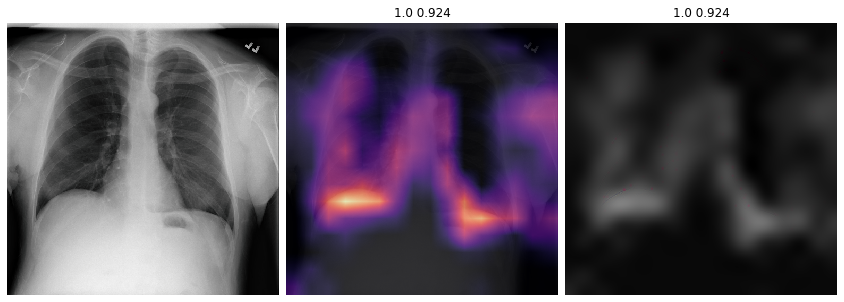

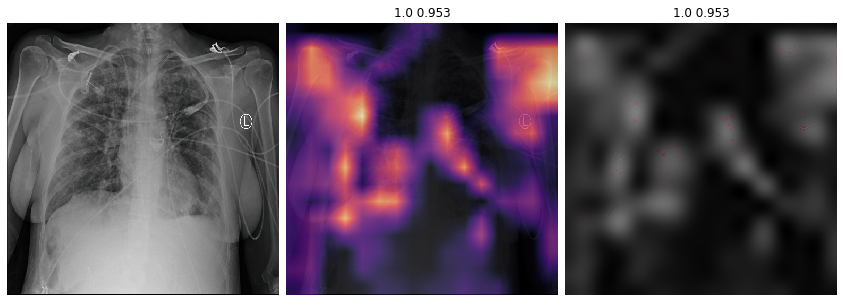

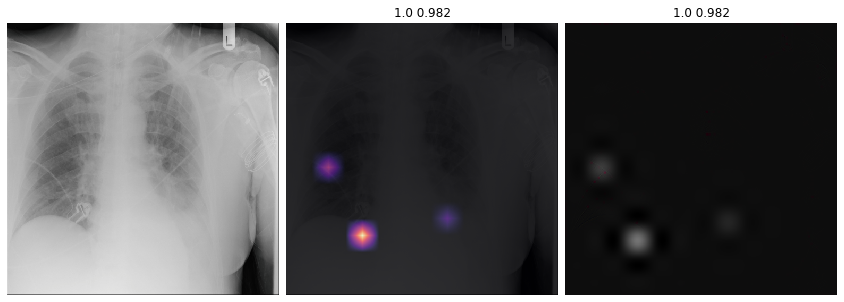

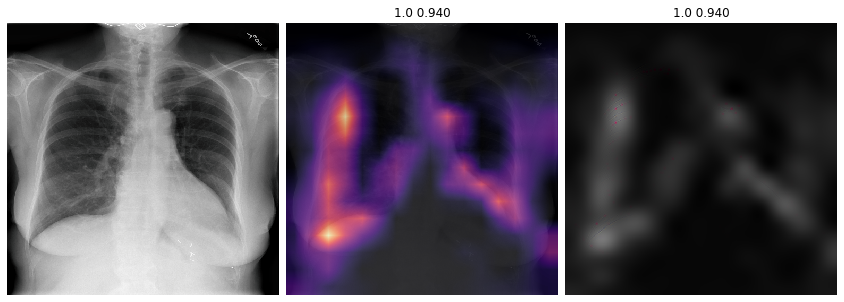

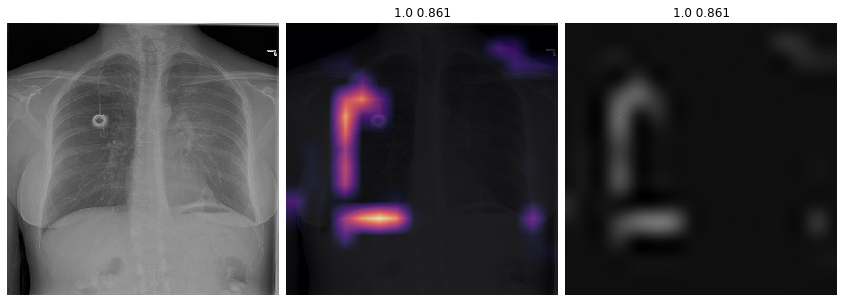

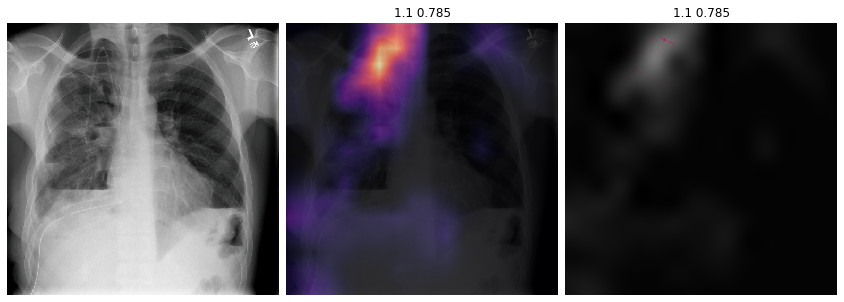

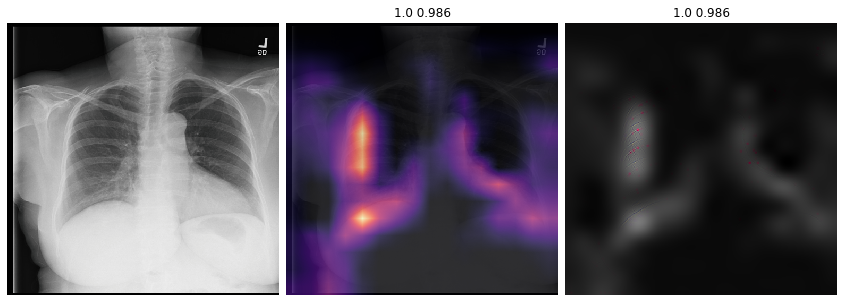

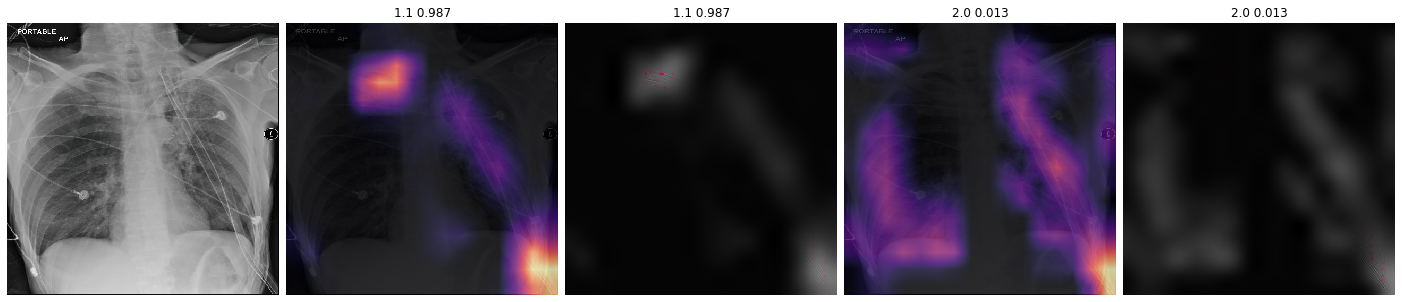

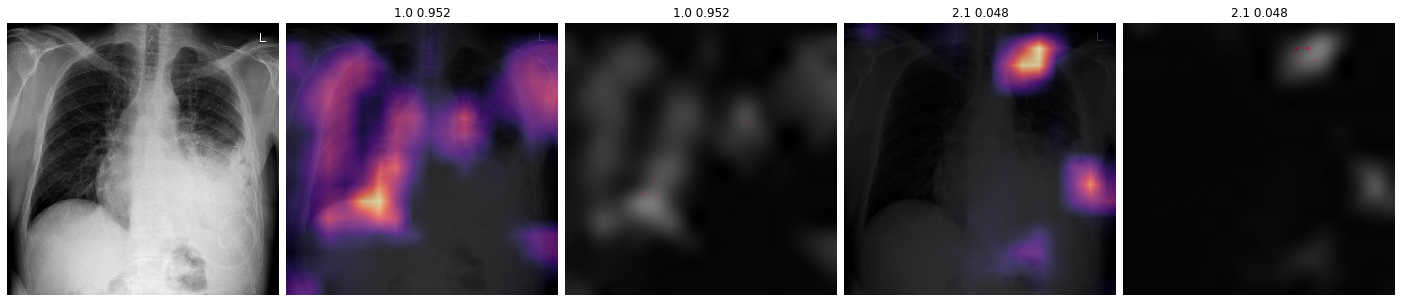

In [0]:
interp = ClassificationInterpretation.from_learner(learn,ds_type = DatasetType.Valid)
for idx in range(20,40):
    gcam = GradCam.from_interp(learn,interp,idx,ds_type = DatasetType.Valid,include_label=True)
    gcam.plot()


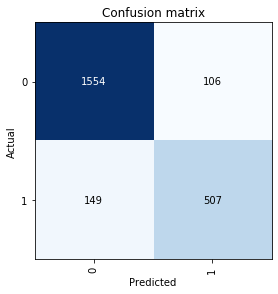

In [0]:
interp.plot_confusion_matrix()

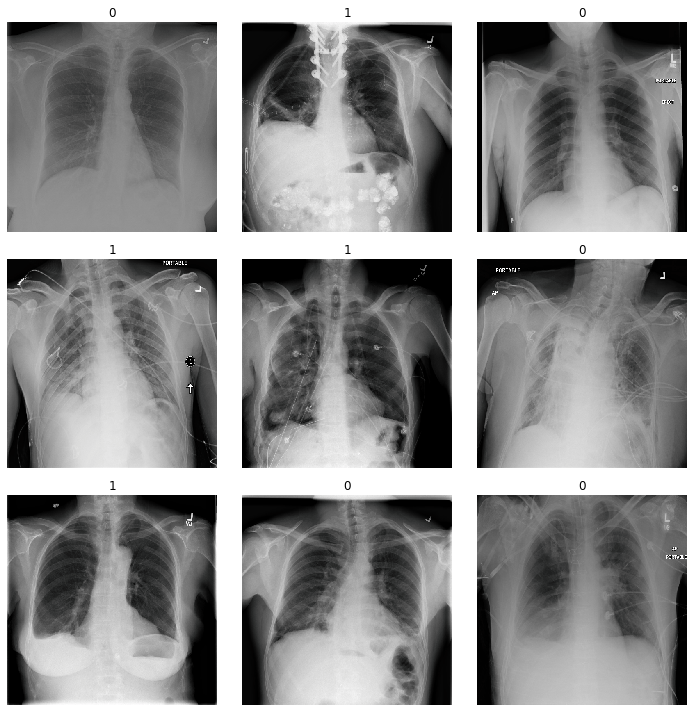

In [0]:
data.show_batch(rows=3, figsize=(10,10),DatasetType=1)